<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# Recitation 6: Covariance and Correlation

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">
## 6.0 Overview of Learning Objectives:

In this recitation we will explore the following objectives:

-Understand the derivation and conceptual basis for covariance and how to calculate it

-How to estimate covariance values from given distributions of data

-The limitations of covariance value and subsequently the derivation and use of the correlation coefficient

-The covariance matrix and how to use it to calculate covariance and correlation coefficients for multiple variables
<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 6.1 Multivariable Continuous Distributions and Covariance

We can define a joint distribution function for two variables $x,y$ as $F(x,y)=P\{(x'<x)\cap (y' < y)\}$ that has the two properties:

* $F(\infty,\infty)=1$
* $F(-\infty,y)=F(x,-\infty)=0$
* $F$ is monotone increasing.

This is useful but overshadowed by the much more useful probability density which we can define as $f(x,y)=\frac{\partial^2 F}{\partial x \partial y}$ which by convention is usually normalized, i.e. $\iint \text{d}x\text{d}y f(x,y)=1$. Given this multivariable distribution we can calculate its moments:

Means:<br><br>
$\mu_x = \langle x \rangle$<br>
$\mu_y = \langle y \rangle$<br><br>

Variances:<br><br>
$\text{var}(x)=\sigma_x^2 = \langle (x-\mu_x)^2\rangle$<br>
$\text{var}(y)=\sigma_y^2 = \langle (y-\mu_y)^2\rangle$ <br>
$\text{var}(x,y)=\sigma_{x,y}=\langle(x-\mu_x)(y-\mu_y)\rangle=\langle{xy}\rangle-\langle{x}\rangle\langle{y}\rangle$ <br><br>
The first few terms are nothing new that we haven't seen from single variable distributions, but here we introduce the new 'mixed variance' term combining the variance of $x$ and $y$. This value is called the $\text{covariance}$ and is often written as $\text{cov}(x,y)$.

# <!--start-block-->
<hr style="height: 1px;">

## 6.2 Worked Covariance Examples and Problems
We can take a look at some linear distributions to get a better intuition for how this value scales:

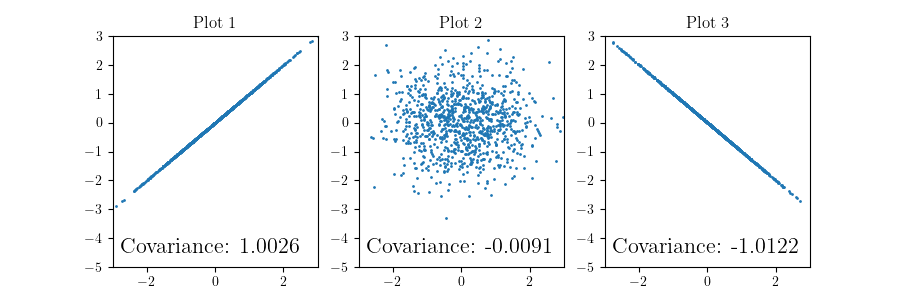 <br><br>

We can see that plots one and three have very clear linear relationships between $x$ and $y$ resulting in large covariance values. We also notice that the sign of the covariance matches the sign of the slope of the linear relationship. By contrast plot two has a covariance value that is approximately zero since there isn't any distinguishable trends between $x$ and $y$ for the data given. <br>
Using this, let's try to rank the covariance values for the following distributions:
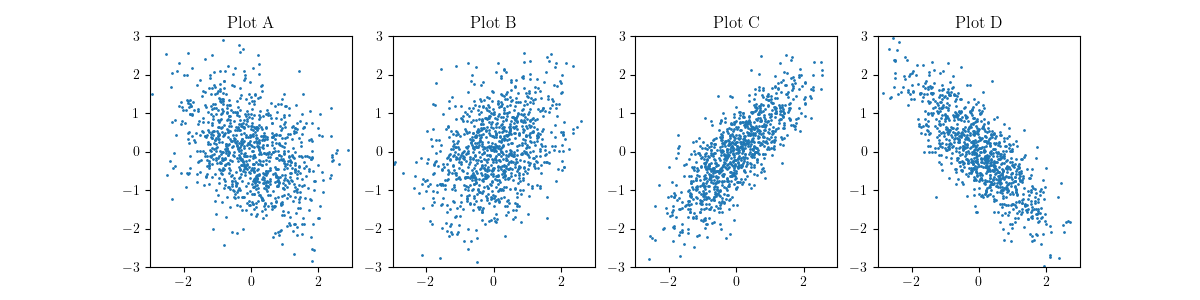<br><br>

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span> 
Which of the following is the correct ordering of the value of $\text{cov}(x,y)$ in the plots above?
* $A<B<C<D$
* $B<A<D<C$
* $D<A<B<C$  <-- THIS ONE
* $D<B<C<A$



<!--start-block-->
<hr style="height: 1px;"> <br>

## 6.3 Correlation Coefficient

While covariance is an important value in data analysis, it is difficult to use this value alone to determine the degree of correlation or to make comparisons between different sets of data. One issue responsible for this is the fact that $\text{cov}(x,y)$ is not bounded, so to solve this we introduce the dimensionless $\text{correlation coefficient}$ which is defined by $\rho_{x,y}\equiv \sigma_{x,y}/\sigma_x\sigma_y$. <br> <br>
By the Cauchy-Schwarz inequality and the 'geometric' relationship between $\sigma_{x,y}$ and $\sigma_x,\sigma_y$ we have that $|\rho_{x,y}|\leq 1$. This $\rho_{x,y}$ is known as Pearson's correlation coefficient and measures the linear relationship between variables.<br><br>
Similarly to the covariance values, $\rho$ will take both positive and negative values depending on the sign of the slope, with $\rho=\pm 1$ indicating a perfect linear correlation between $x$ and $y$ and $\rho=0$ showing there isn't a clear linear relationship. We can see this with some examples:
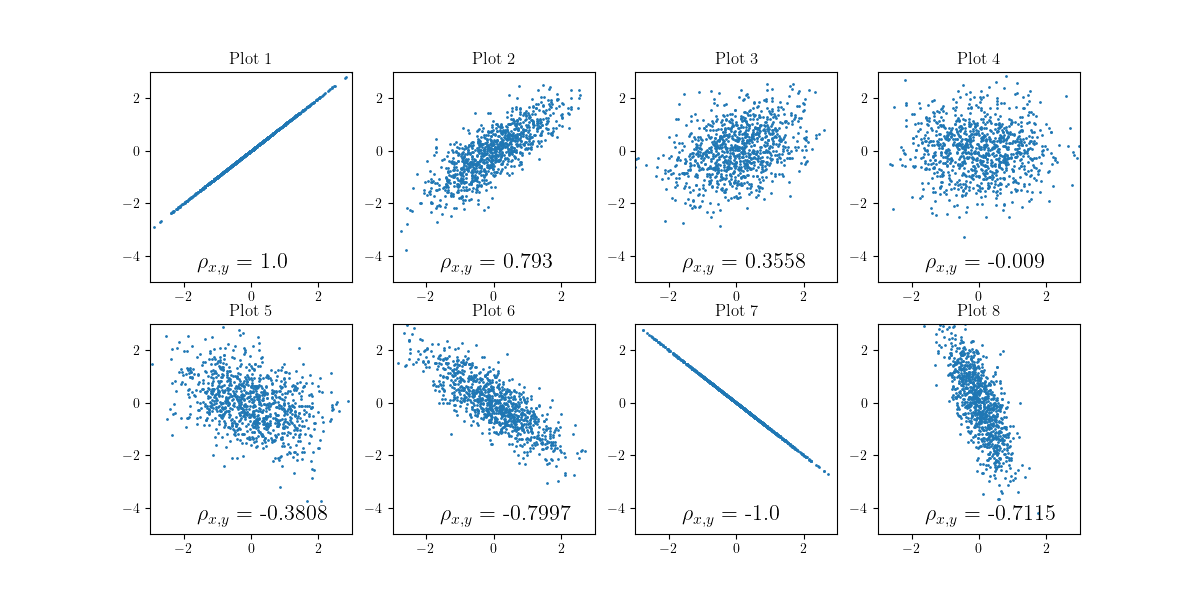



<!--start-block-->
<hr style="height: 1px;"> <br>

## 6.4 Covariance Matrix and Computational Examples

Taking a look at how we can actually compute these values using Python, we look to the numpy library which allows us to calculate the covariance between two datasets $x$ and $y$ using the command np.cov($x,y$):

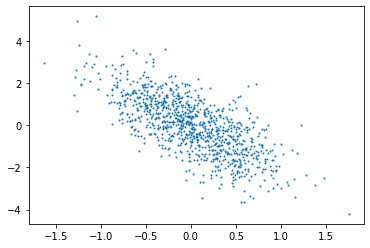

[[ 0.23453649 -0.46197688]
 [-0.46197688  1.79775449]]


In [1]:
#Import necessary libraries
import numpy as np 
import matplotlib.pyplot as plt

pts = np.genfromtxt('slope_2.txt', delimiter=',') #read in example file
x = [n[0] for n in pts]    # get x values
y = [n[1] for n in pts]    # get y values

plt.scatter(x,y,s=1) #Plot the points from our example file
plt.show()

print(np.cov(x,y)) #Print out covariance of x,y

We notice however that when printing out the results of our numpy covariance command, we don't get a single value but rather a 2D list. This is meant to represent what is known as the $\text{covariance matrix}$ from which we can compute the covariance and correlation coefficients.<br><br>
For a set of $N$ datasets, $x_1,x_2,...,x_N$, the covariance matrix is an $N\times N$ matrix where the diagonal entries are the variance or $\sigma^2$ of the corresponding dataset, i.e. $M_{ii}=\text{var}(x_i)=\sigma_i^2$. Additionally the off-diagonal values contain the variance of two datasets, so $M_{ij}=\sigma_{i,j}$. The covariance $\sigma_{i,j}$ is equivalent to $\sigma_{j,i}$ so $M$ is a symmetric matrix. Shown visually we have for $3$ datasets $x,y$, and $z$:<br><br>
\begin{gather*}M=\begin{pmatrix} \sigma_x^2 & \sigma_{x,y} & \sigma_{x,z}\\ 
\sigma_{y,x} & \sigma_{y}^2 & \sigma_{y,z}\\ \sigma_{z,x} & \sigma_{z,y} & \sigma_{z}^2 \end{pmatrix}\end{gather*}<br><br>

For more than two datasets this changes our numpy syntax slightly:

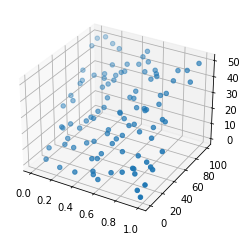

[[ 8.38798699e-02 -1.03604938e+00 -5.28743329e-01]
 [-1.03604938e+00  8.38594044e+02  4.18803917e+02]
 [-5.28743329e-01  4.18803917e+02  2.09494671e+02]]


In [2]:
#Generating our three datasets
x = np.random.random(100)
y = np.arange(100)+np.random.uniform(-2,2,size=(100,))
delta = np.random.uniform(-1,1,size=(100,))
z = .5*y+delta

#Plotting our data
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z)
plt.show()

#Getting our covariance matrix, notice how we need a list for 3 datasets here instead of just two arguments
M = np.cov([x,y,z])
print(M)

While this data might look to carry no strong relationships visually between $x,y,$ and $z$ by examining the covariance matrix we can see a large covariance value for $\sigma_{y,z}=\sigma_{z,y}$ meaning that they are likely correlated. In fact if we calcualate $\rho_{y,z}$ we get a value of $0.992$, meaning these datasets are very strongly correlated!<br><br>
Using what we've learned about the covariance matrix and the correlation coefficient let's use some basic Python to answer the following question:

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span>
Given a covariance matrix $M$ with $N$ datasets, $x_0,x_1,...,x_{N-1}$ , create three functions to find the following:
* The function std_i which returns the standard deviation of dataset $i$
* The function cov_ij which returns covariance of datasets $x_i$ and $x_j$, i.e. $\sigma_{i,j}$
* The function cor_ij which returns the correlation coefficient of datasets $x_i$ and $x_j$, i.e. $\rho_{i,j}$ <br>
Design your functions such that they take in 2-3 parameters, those being the covariance matrix $M$ and the indices requested.

In [3]:
def std_i(M,i):
    return np.sqrt(M[i][i])

def cov_ij(M,i,j):
    return M[i][j]

def cor_ij(M,i,j):
    return M[i][j]/(np.sqrt(M[i][i]*M[i][j]))